In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [363]:
df_churndata = pd.read_csv('churn_data.csv')

In [364]:
df_churndata.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [365]:
df_churndata.describe(include='O')

,housing,payment_type,zodiac_sign
count,27000,27000,27000
unique,3,5,13
top,na,Bi-Weekly,Cancer
freq,13860,12716,2424


In [366]:
df_churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [367]:
df_churndata.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [368]:
df_churndata.isnull().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [369]:
df_churndata.isna().sum()
df_churndata.shape

(27000, 31)

In [370]:
df_churndata = df_churndata.drop(columns=['reward_rate','credit_score'],axis = 1)

In [371]:
df_churndata.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'is_referred'],
      dtype='object')

In [372]:
#removing the rows were age data is missing
df_churndata = df_churndata[pd.notnull(df_churndata['age'])]

In [373]:
df_churndata.shape

(26996, 29)

In [374]:
df_churndata_2 = df_churndata.drop(columns=['churn','user'])

In [375]:
for i in df_churndata_2.columns:
    print(i)

age
housing
deposits
withdrawal
purchases_partners
purchases
cc_taken
cc_recommended
cc_disliked
cc_liked
cc_application_begin
app_downloaded
web_user
app_web_user
ios_user
android_user
registered_phones
payment_type
waiting_4_loan
cancelled_loan
received_loan
rejected_loan
zodiac_sign
left_for_two_month_plus
left_for_one_month
rewards_earned
is_referred


In [376]:
#for i in df_churndata_2.columns:
   # f, axes = plt.subplots(df_churndata_2.shape[0], 2, figsize=(7, 7), sharex=True)
    #sns.distplot( df_churndata_2[i] , color="skyblue", ax=axes[0, 0])
   # sns.distplot( df_churndata_2[i] , color="skyblue", ax=axes[0, 0])
   ### sns.distplot( df_churndata_2[i] , color="skyblue", ax=axes[0, 0])
   # sns.distplot( df_churndata_2[i] , color="skyblue", ax=axes[0, 0])
   # sns.distplot( df["sepal_width"] , color="olive", ax=axes[0, 1])
   # sns.distplot( df["petal_length"] , color="gold", ax=axes[1, 0])
   # sns.distplot( df["petal_width"] , color="teal", ax=axes[1, 1])

In [377]:

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

In [378]:
'''''
fig, axs = plt.subplots(10, 2, sharey=True, tight_layout=True)
for i in range(1,10):
    
    plt.hist(df_churndata_2.iloc[:,i])'''
    

"''\nfig, axs = plt.subplots(10, 2, sharey=True, tight_layout=True)\nfor i in range(1,10):\n    \n    plt.hist(df_churndata_2.iloc[:,i])"

In [379]:
df_churndata_2.columns

Index(['age', 'housing', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'payment_type',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month',
       'rewards_earned', 'is_referred'],
      dtype='object')

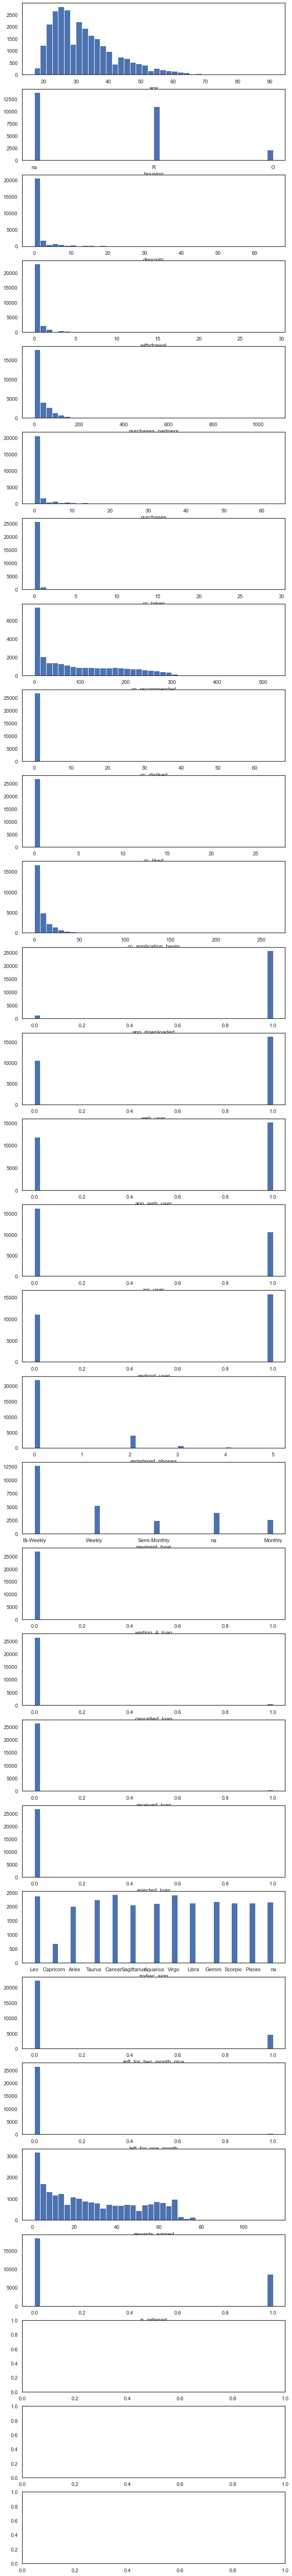

In [380]:
%matplotlib inline
fig, axes = plt.subplots(30, 1, figsize=(10, 100),squeeze=False)
f=axes.flatten()
for i, feature in enumerate(df_churndata_2.columns):
    
 f[i].hist(df_churndata_2[feature], bins = 40)
 f[i].set_xlabel(df_churndata_2.columns[i])
plt.show()

    


 



In [381]:
df_churndata_3 = df_churndata[['housing','is_referred','app_downloaded','web_user','app_web_user','zodiac_sign']]

In [382]:
df_churndata_3.head(3)

,housing,is_referred,app_downloaded,web_user,app_web_user,zodiac_sign
0,na,0,1,1,1,Leo
1,R,1,1,1,1,Leo
2,R,0,1,0,0,Capricorn


In [383]:
len(df_churndata_3.columns)

6

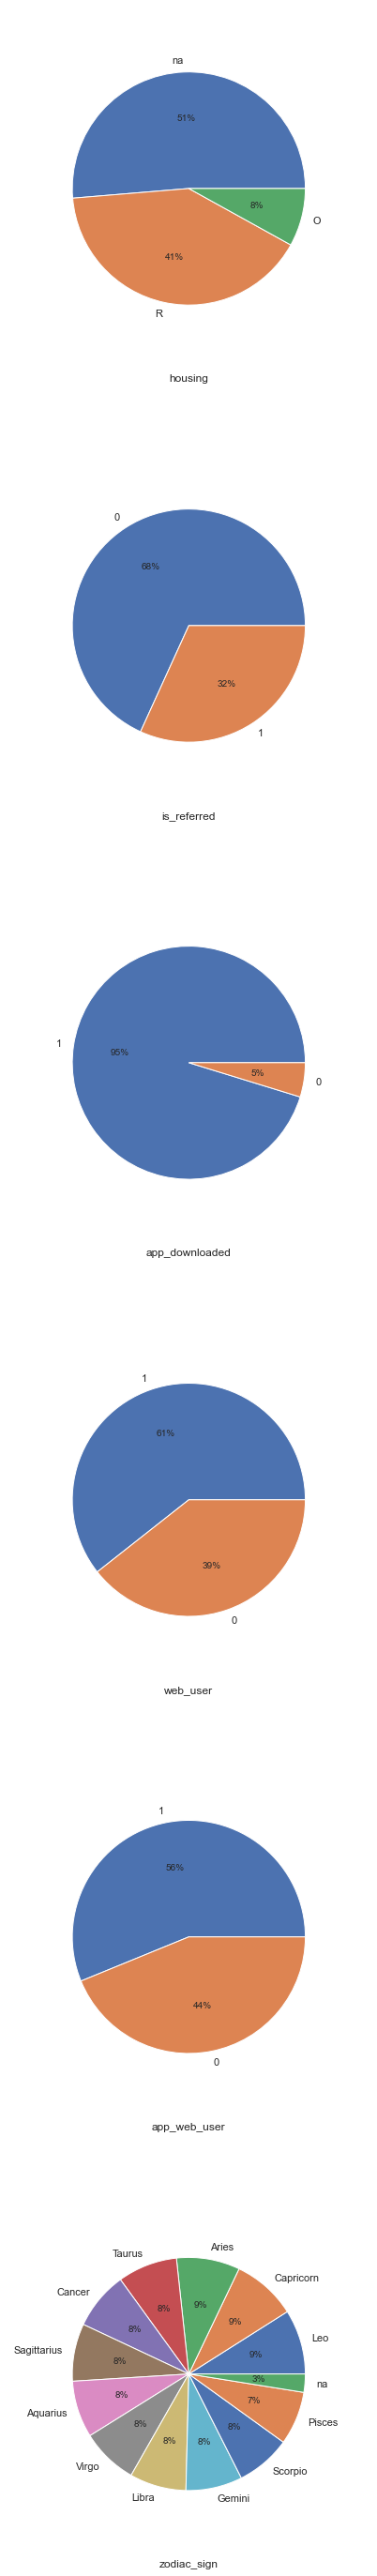

In [384]:
%matplotlib inline
fig, axes = plt.subplots(len(df_churndata_3.columns), 1, figsize=(50, 50),squeeze=False)
f=axes.flatten()
for i, feature in enumerate(df_churndata_3.columns):
 #index = df_churndata_3.value_counts(normalize = True).index   
 f[i].pie(df_churndata_3[feature].value_counts(normalize=True).values,autopct='%.0f%%',radius = 0.8,center = (0,0),\
          labels=df_churndata_3[feature].unique())
 f[i].set_xlabel(df_churndata_3.columns[i])
plt.show()

    


 



In [385]:
df_churndata[df_churndata.left_for_one_month ==1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

In [386]:
df_churndata[df_churndata.rejected_loan ==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

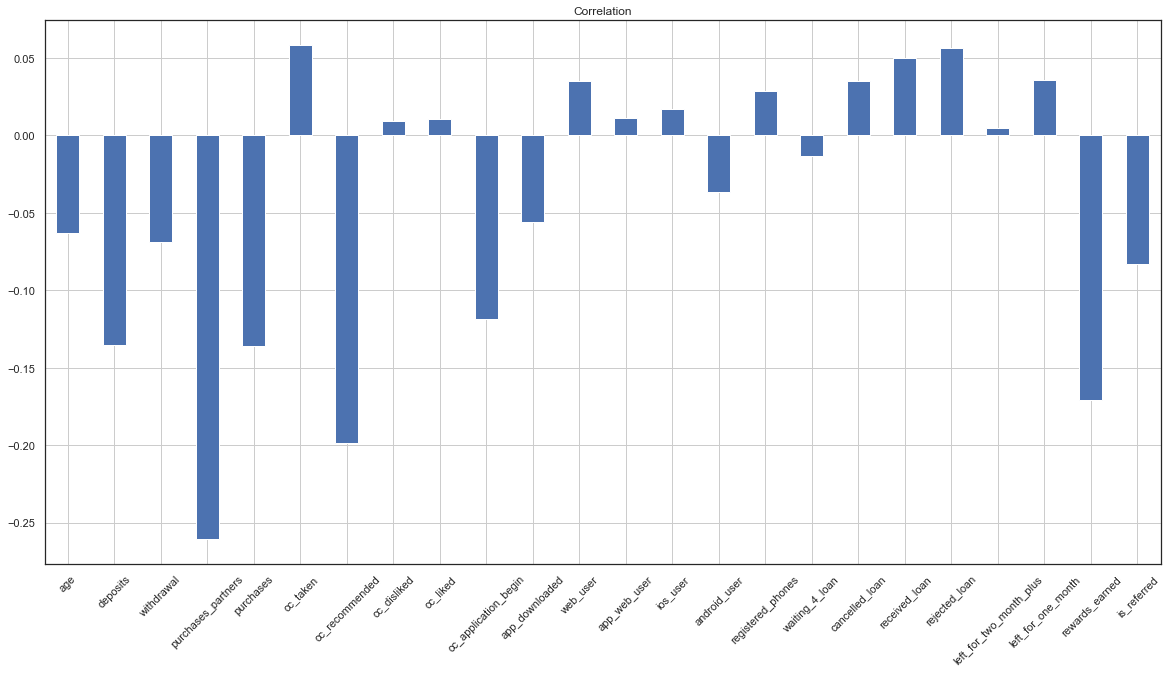

In [387]:
df_churndata.drop(columns = ['churn','user','zodiac_sign','housing','payment_type']).corrwith(df_churndata.churn).\
                    plot.bar(figsize = (20,10), title = "Correlation", rot = 45,
                            grid  = True)

In [388]:
df_churndata.drop(columns = ['churn','user','zodiac_sign','housing','payment_type']).corrwith(df_churndata.churn)

age                       -0.063206
deposits                  -0.135381
withdrawal                -0.068543
purchases_partners        -0.260784
purchases                 -0.135921
cc_taken                   0.058383
cc_recommended            -0.198570
cc_disliked                0.009423
cc_liked                   0.010886
cc_application_begin      -0.118590
app_downloaded            -0.055647
web_user                   0.035053
app_web_user               0.011092
ios_user                   0.017026
android_user              -0.036626
registered_phones          0.028578
waiting_4_loan            -0.013558
cancelled_loan             0.035275
received_loan              0.049960
rejected_loan              0.056457
left_for_two_month_plus    0.005094
left_for_one_month         0.036134
rewards_earned            -0.170863
is_referred               -0.083241
dtype: float64

## corelation matrix diagram

In [389]:
sns.set(style='white')

In [390]:
corr = df_churndata.drop(columns=['user','churn']).corr()

In [391]:
corr

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,is_referred
age,1.000000,0.088757,0.044177,-0.000943,0.088769,0.077199,0.095860,0.005577,0.019512,0.164872,...,-0.210068,-0.001354,0.004164,-0.003713,-0.001808,0.011030,-0.022500,0.034534,0.130108,-0.001557
deposits,0.088757,1.000000,0.488902,0.326588,0.998554,-0.047058,0.376123,-0.014680,-0.012111,0.452493,...,-0.002171,0.040044,-0.002928,0.011381,-0.009439,-0.018501,0.048370,-0.011354,0.248797,0.229957
withdrawal,0.044177,0.488902,1.000000,0.223692,0.488285,-0.040658,0.187423,-0.011105,-0.003197,0.295733,...,-0.004248,0.047112,0.003173,-0.002577,-0.006240,-0.009826,0.032079,-0.009968,0.094038,0.211614
purchases_partners,-0.000943,0.326588,0.223692,1.000000,0.326529,-0.101511,0.594491,-0.035335,-0.033016,0.411316,...,0.048343,0.072166,0.000089,0.014012,-0.015040,-0.030989,0.082333,-0.032074,0.403507,0.301542
purchases,0.088769,0.998554,0.488285,0.326529,1.000000,-0.047082,0.376666,-0.014583,-0.012194,0.453160,...,-0.001371,0.039667,-0.002712,0.011687,-0.009273,-0.018337,0.048654,-0.011511,0.249345,0.230099
cc_taken,0.077199,-0.047058,-0.040658,-0.101511,-0.047082,1.000000,0.115100,0.182655,0.168530,0.165640,...,-0.044865,0.042719,-0.006079,0.004685,0.046760,0.006387,-0.016006,0.085823,0.148875,-0.025004
cc_recommended,0.095860,0.376123,0.187423,0.594491,0.376666,0.115100,1.000000,0.048076,0.055571,0.611520,...,0.093413,0.125966,-0.018087,0.014188,0.044977,-0.037966,0.045625,0.037735,0.915712,0.241626
cc_disliked,0.005577,-0.014680,-0.011105,-0.035335,-0.014583,0.182655,0.048076,1.000000,0.095500,0.083475,...,0.005893,0.025728,-0.002094,0.011349,0.014676,-0.002854,-0.012925,0.033594,0.060708,-0.009285
cc_liked,0.019512,-0.012111,-0.003197,-0.033016,-0.012194,0.168530,0.055571,0.095500,1.000000,0.068826,...,-0.005965,0.025381,-0.001984,0.002677,0.021603,-0.001630,-0.007150,0.007706,0.065415,-0.012215
cc_application_begin,0.164872,0.452493,0.295733,0.411316,0.453160,0.165640,0.611520,0.083475,0.068826,1.000000,...,-0.009366,0.101539,-0.001645,0.008788,0.029661,-0.021088,0.031599,0.047561,0.496164,0.272574


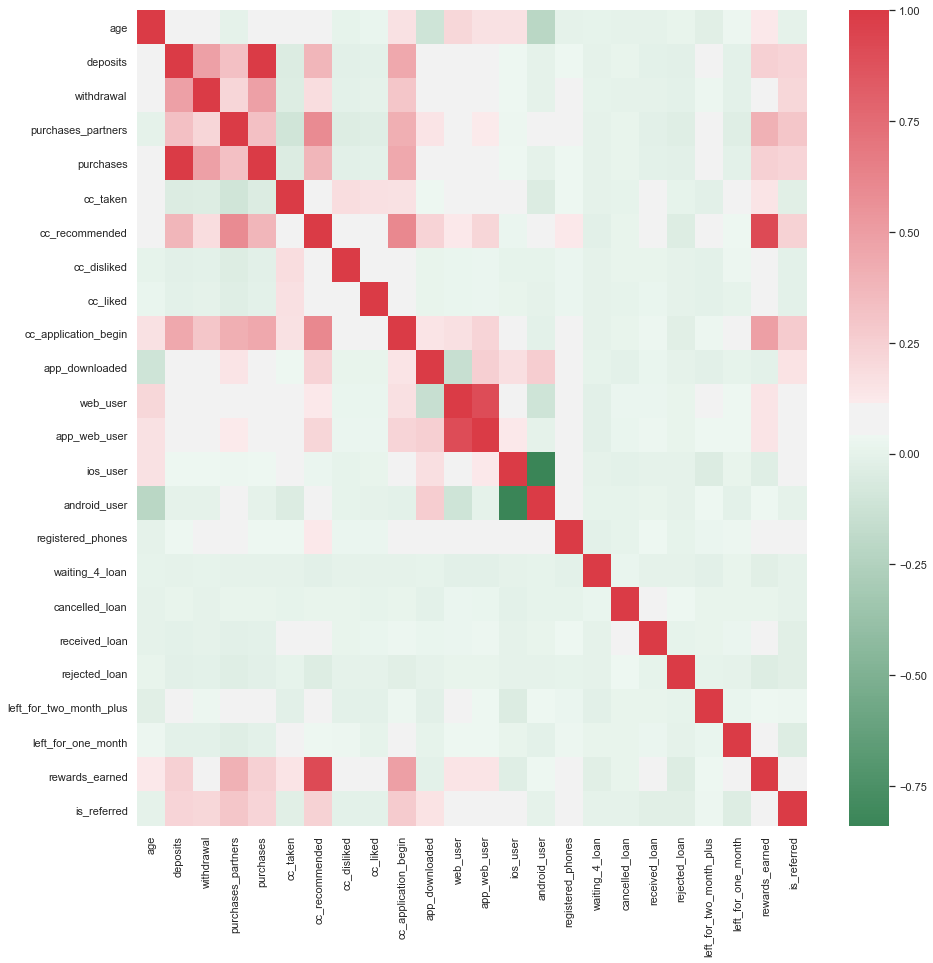

In [392]:

f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr,cmap=cmap)

In [393]:
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

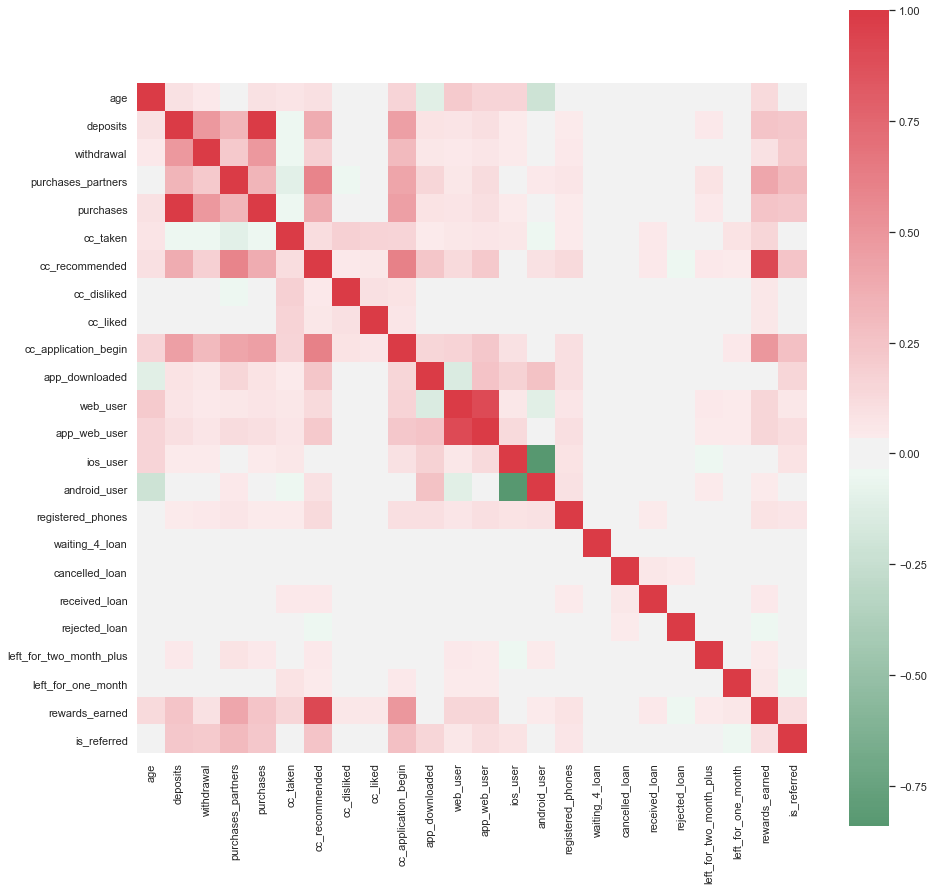

In [394]:
f, ax = plt.subplots(figsize = (15,15))
cmap = sns.diverging_palette(500,10, as_cmap= True)
sns.heatmap(corr,  cmap = cmap, center=0,
           square=True)

In [395]:
cmap

In [396]:
dmap = sns.diverging_palette(500,10, as_cmap= False)

In [397]:
dmap

[(0.22708394455496284, 0.5223412071210161, 0.3424906574041789),
 (0.5221593716850426, 0.710056010464153, 0.5956022169124737),
 (0.8172347988151224, 0.89777081380729, 0.8487137764207686),
 (0.9632833568933667, 0.8055338995788012, 0.8173119687047948),
 (0.9089102455307556, 0.5175520461248753, 0.5467720764444421),
 (0.8545371341681446, 0.22957019267094914, 0.2762321841840895)]

In [398]:
df_churndata = df_churndata.drop(columns=['android_user'])

In [399]:
df_churndata.head(2)

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,44.0,1


In [400]:
df_churndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     26996 non-null  int64  
 1   churn                    26996 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  26996 non-null  object 
 4   deposits                 26996 non-null  int64  
 5   withdrawal               26996 non-null  int64  
 6   purchases_partners       26996 non-null  int64  
 7   purchases                26996 non-null  int64  
 8   cc_taken                 26996 non-null  int64  
 9   cc_recommended           26996 non-null  int64  
 10  cc_disliked              26996 non-null  int64  
 11  cc_liked                 26996 non-null  int64  
 12  cc_application_begin     26996 non-null  int64  
 13  app_downloaded           26996 non-null  int64  
 14  web_user              

In [401]:
df_churndata_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      26996 non-null  float64
 1   housing                  26996 non-null  object 
 2   deposits                 26996 non-null  int64  
 3   withdrawal               26996 non-null  int64  
 4   purchases_partners       26996 non-null  int64  
 5   purchases                26996 non-null  int64  
 6   cc_taken                 26996 non-null  int64  
 7   cc_recommended           26996 non-null  int64  
 8   cc_disliked              26996 non-null  int64  
 9   cc_liked                 26996 non-null  int64  
 10  cc_application_begin     26996 non-null  int64  
 11  app_downloaded           26996 non-null  int64  
 12  web_user                 26996 non-null  int64  
 13  app_web_user             26996 non-null  int64  
 14  ios_user              

In [402]:
df_churndata.head(3)

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,44.0,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,0


In [403]:
again = pd.read_csv('churn_data.csv')

In [404]:
again.head(3)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0


In [405]:
again.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [406]:
again.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [407]:
again.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [408]:
df_churndata.isna().any()

user                       False
churn                      False
age                        False
housing                    False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
is_referred                False
dtype: bool

In [409]:
df_churndata = df_churndata.drop(columns=['rewards_earned'])

In [410]:
df_churndata['reward_rate'] = again['reward_rate']

In [411]:
df_churndata = df_churndata.drop(columns=['reward_rate'])

In [412]:
again = pd.read_csv("churn_data.csv")

In [413]:
again = again[pd.notnull(again['age'])]

In [414]:
df_churndata['reward_rate'] = again['reward_rate']

In [415]:
df_churndata.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus',
       'left_for_one_month', 'is_referred', 'reward_rate'],
      dtype='object')

In [416]:
user_identifier = df_churndata['user']

In [417]:
df_churndata = df_churndata.drop(columns='user')

In [418]:
df_churndata.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [419]:
df_churndata = pd.get_dummies(df_churndata)

In [420]:
df_churndata.head(2)

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,0,37.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,28.0,0,0,1,0,0,96,0,0,...,0,0,1,0,0,0,0,0,0,0


In [421]:
df_churndata.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'is_referred', 'reward_rate', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [422]:
df_churndata = df_churndata.drop(columns=['housing_na','zodiac_sign_na',
                                         'payment_type_na'])

In [423]:
from sklearn.model_selection import train_test_split

In [424]:
X_train, X_test, y_train, y_test = train_test_split(df_churndata.drop(columns=['churn'])
                                                   , df_churndata['churn'],test_size = 0.2,
                                                   random_state = 0)

In [425]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [426]:
y_train.values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [427]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [428]:
import random

In [429]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index

random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
    

In [430]:
len(higher)

8940

In [431]:
len(lower)

8940

In [432]:
new_indices = np.concatenate((lower, higher))

In [433]:
new_indices

array([11697, 19770,  8356, ...,  4234, 18280,  8214], dtype=int64)

In [434]:
new_indices.size

17880

In [435]:
new_indices.shape

(17880,)

In [436]:
new_indices

array([11697, 19770,  8356, ...,  4234, 18280,  8214], dtype=int64)

In [437]:
X_train = X_train.loc[new_indices,]
y_train = y_train.loc[new_indices]

In [438]:
X_train.shape

(17880, 41)

In [439]:
y_train.shape

(17880,)

In [440]:
from sklearn.preprocessing import StandardScaler

In [441]:
sc_X = StandardScaler()

In [442]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [452]:
X_train2.columns = X_train.columns
X_test.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test.index = X_test.index.values
X_train = X_train2
X_test = X_test2


In [455]:
X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.018369,0.880819,-0.288166,-0.613759,0.905316,2.007054,1.234513,-0.071435,-0.068174,1.882615,...,-0.311664,-0.159022,-0.297186,-0.304482,-0.295623,-0.297743,3.517559,-0.28829,-0.30107,-0.318315
1,-0.721661,-0.357181,-0.288166,2.452658,-0.356841,-0.165887,1.698739,-0.071435,-0.068174,-0.408623,...,-0.311664,-0.159022,3.364898,-0.304482,-0.295623,-0.297743,-0.284288,-0.28829,-0.30107,-0.318315


In [456]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [457]:
y_pred = classifier.predict(X_test)

In [468]:
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix,precision_score

In [459]:
cm = confusion_matrix(y_test,y_pred)

In [460]:
cm

array([[1642, 1524],
       [ 559, 1675]], dtype=int64)

In [469]:
recall_score(y_test,y_pred)

0.7497761862130707

In [461]:
accuracy_score(y_test,y_pred)

0.6142592592592593

In [462]:
precision_score(y_test,y_pred)

0.5236011253516724

In [470]:
f1_score(y_test,y_pred)

0.616602245536536

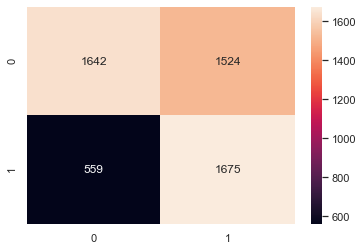

In [467]:
sns.heatmap(cm, annot = True,fmt='.5g')

In [476]:
from sklearn.model_selection import cross_val_score

In [477]:
accuracies = cross_val_score(estimator = classifier,
                            X = X_train,
                            y = y_train,
                            cv = 10)

In [478]:
accuracies

array([0.63982103, 0.64876957, 0.64932886, 0.62807606, 0.63702461,
       0.65100671, 0.63534676, 0.651566  , 0.63870246, 0.66107383])

In [480]:
pd.concat([pd.DataFrame(X_train.columns,columns = ['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ['coeff'])],axis =1)

,features,coeff
0,age,-0.165270
1,deposits,0.476308
2,withdrawal,0.059359
3,purchases_partners,-0.722341
4,purchases,-0.620409
5,cc_taken,0.093058
6,cc_recommended,0.043143
7,cc_disliked,-0.001461
8,cc_liked,-0.006943
9,cc_application_begin,0.038526


In [481]:
 classifier.coef_

array([[-0.16526966,  0.47630843,  0.05935891, -0.72234129, -0.62040877,
         0.09305793,  0.04314283, -0.00146073, -0.00694309,  0.0385263 ,
        -0.01063661,  0.09505521,  0.04257935,  0.06438813,  0.06617819,
        -0.04807978,  0.06734694,  0.10784109,  0.11438092,  0.05333373,
         0.03680817,  0.01038827, -0.17447677, -0.03567501,  0.01080733,
        -0.06404759, -0.02541953, -0.03166213,  0.04976566, -0.01624622,
         0.03473009,  0.02731201,  0.03216231, -0.02055559,  0.02812959,
        -0.00500456,  0.01899519,  0.02772822,  0.0076732 , -0.01142533,
         0.01198359]])

In [482]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [483]:
classifier  = LogisticRegression()

In [484]:
rfe = RFE(classifier, 20)

C:\Users\Allen Varughese\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [487]:
rfe =rfe.fit(X_train,y_train)

In [488]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False  True False  True
 False  True  True  True  True  True  True  True  True False  True  True
 False False False False  True False False False False False False False
 False False False False False]


In [489]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 22, 20,  1, 15,  1, 11,  1,  1,  1,  1,
        1,  1,  1,  1, 16,  1,  1, 18,  2,  9,  8,  1, 17,  3,  6,  4, 14,
        5, 21, 10,  7, 13, 19, 12])